# Computational Methods in Economics

## Problem Set 4: Function Approximation - Suggested Solutions

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-01-17 10:38:18.801535


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa

**Note**: The last command imports the **funapprox_cme** module, which contains the functions defined in the lecture. The Python-file **funapprox_cme.py** which can be downloaded from LSF must be saved in the same folder as this notebook.

## Question 1 (N)

Construct the 5- and 50-degree approximants for the function $f(x) = \exp(-x^2)$ on the interval $[0, 2]$ using each of the following interpolation schemens:

(a) Equally spaced nodes, monomial basis

(b) Chebyshev nodes, Chebyshev basis

For each scheme and degree of approximation, plot the approximation error.

#### Answer

Start by defining the function that we want to approximate.

In [3]:
def fun(x, alpha = 1):
    """
    Exponential function
    """
    y = np.exp(-alpha * x**2)

    return y

Next, we define the grid, first for $m = 6$. We need two grids, one consisting of equally spaced nodes, one consisting of Chebyshev nodes.

In [4]:
g_min, g_max = 0, 2
m = 6

## equally spaced nodes
x_eq = np.linspace(g_min, g_max, m)
y_eq = fun(x_eq) 
## Chebyshev nodes
x_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(x_cn)


In addition, we also define a dense grid along which we approximate the function.

In [5]:
x = np.linspace(g_min, g_max, 1001)
y = fun(x)

For question (a), the interpolation scheme involves a monomial basis, evaluated at the equally spaced nodes. We use the Numpy function **polyfit** for the interpolation step:

In [6]:
a_mono = np.polynomial.polynomial.polyfit(x_eq, y_eq, m-1)
y_mono = np.polynomial.polynomial.polyval(x, a_mono)

For question (b), we use the **chebapprox** function defined in the lecture:

In [7]:
a_cheb = fa.chebapprox(y_cn , m-1)
y_cheb = np.polynomial.chebyshev.chebval( fa.chebconvert(x, g_min, g_max), a_cheb)

Finally, we plot the true and approximated function values, as well as the absolute approximation errors. As expected, using Chebyshev nodes leads to a smaller maximum error.

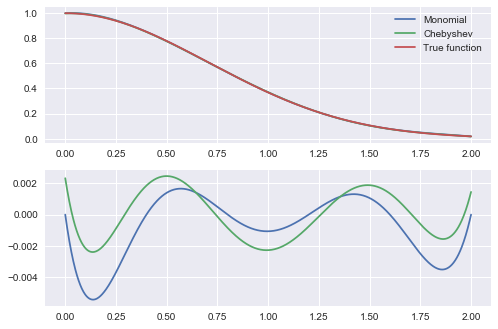

In [8]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y_mono, label = 'Monomial')
ax[0].plot(x, y_cheb, label = 'Chebyshev')
ax[0].plot(x, y, label = 'True function')
ax[0].legend()
ax[1].plot(x, y - y_mono)
ax[1].plot(x, y - y_cheb)

We repeat the same steps for $m = 51$. The approximation errors are essentially zero for both schemes (since we use a high degree of approximation in both cases). Unsurprisingly given what we know about the Vandermonde matrix when using a monomial basis, we get a warning about a poorly conditioned fit.

In [9]:
m = 51

## equally spaced nodes
x_eq = np.linspace(g_min, g_max, m)
y_eq = fun(x_eq) 
## Chebyshev nodes
x_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(x_cn)

a_mono = np.polynomial.polynomial.polyfit(x_eq, y_eq, m-1)
y_mono = np.polynomial.polynomial.polyval(x, a_mono)

a_cheb = fa.chebapprox(y_cn , m-1)
y_cheb = np.polynomial.chebyshev.chebval( fa.chebconvert(x, g_min, g_max), a_cheb)

C:\Users\schmitt\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RankWarning: The fit may be poorly conditioned


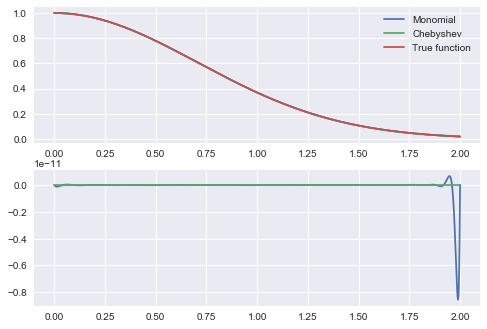

In [10]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y_mono, label = 'Monomial')
ax[0].plot(x, y_cheb, label = 'Chebyshev')
ax[0].plot(x, y, label = 'True function')
ax[0].legend()
ax[1].plot(x, y - y_mono)
ax[1].plot(x, y - y_cheb)

## Question 2 (N)

This question illustrates why we should use Chebyshev nodes instead of equally spaced (equidistant) nodes. We use *Runge's function* as an example:

\begin{equation}
    f(x) = \frac{1}{1 + \alpha x^2}
\end{equation}

Approximate this function on the interval $[-5, 5]$ using all possible combinations of equally spaced/Chebyshev nodes for the interpolation grid and monomials/Chebyshev polynomials for the basis functions. What choice has a bigger impact on the approximation error?

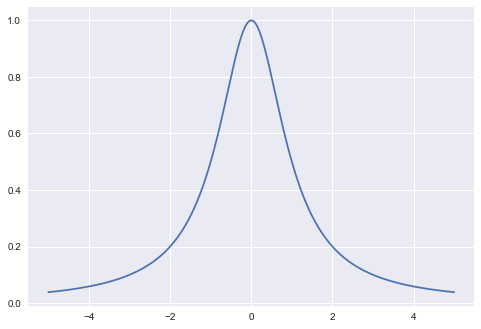

In [11]:
def fun(x, alpha = 1):
    """
    Runge's Function
    """
    return (1 + alpha * x**2)**(-1)

## dense grid
N = 1001
g_min, g_max = -5, 5
g_long = np.linspace(g_min, g_max, N)
y_long = fun(g_long)

fig, ax = plt.subplots()
ax.plot(g_long, y_long)

In [12]:
## min and max for approximation grid
g_min, g_max = -5, 5
## number of grid points
m = 11

## equally spaced nodes
g_eq = np.linspace(g_min, g_max, m)
y_eq = fun(g_eq)
## Chebyshev grid
g_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(g_cn)

In [13]:
## store basis coefficients in dictionary for results
a = {}

## interpolation step
## monomial basis
a['m_eq'] = np.polynomial.polynomial.polyfit(g_eq, y_eq, m - 1) 
a['m_cn'] = np.polynomial.polynomial.polyfit(g_cn, y_cn, m - 1) 

## Chebyshev basis
a['ch_eq'] = np.polynomial.chebyshev.chebfit(fa.chebconvert(g_eq, g_min, g_max), y_eq, m - 1) 
a['ch_cn'] = fa.chebapprox(y_cn, m - 1) 

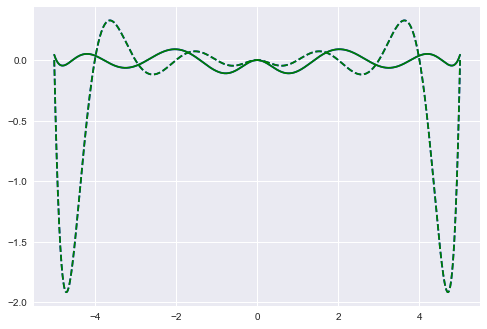

In [14]:

## plot approximation errors
fig, ax = plt.subplots()
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['m_eq']), 'b', linestyle = '--')
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['m_cn']), 'b' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(fa.chebconvert(g_long, g_min, g_max), a['ch_eq']), 'g', linestyle = '--' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(fa.chebconvert(g_long, g_min, g_max), a['ch_cn']), 'g' )

As we can see, what matters for the approximation error is the spacing of the grid points: equally spaced nodes lead a considerably larger interpolation error than Chebyshev nodes. The choice of the basis functions does not seem to affect the size of the interpolation error. 

## Question 3 (N)

In lecture 5, we have solved the neoclassical growth model. As a reminder, here a concise description of the model: 

- Utility function:

\begin{equation}
    u(c, h) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h^{1+\eta}}{1+\eta}
\end{equation}

with $c$ denoting consumption and $h$ labor supply.

- Production function:

\begin{equation}
    f(k, h) = A k^\alpha h^{1-\alpha}
\end{equation}
with $k$ denoting the capital stock, and $A$ the productivity level.

- Resource Constraint:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t
\end{equation}

- Planner's Problem:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}
s.t. the resource constraint.

In this question, we want to approximate the *value function* $V$, which is defined as the objective function - here lifetime utility of the representative agent - evaluated at the *optimal* sequences for capital and labor supply, $(k^*_t, h^*_t)_{t = 0}^\infty$ (and hence, via the resource constraint, optimal consumption). The value function in period 0 is a function of the initial capital stock $k_0$; in order to be feasible, any optimal sequence must satisfy $k^*_0 = k_0$:

\begin{equation}
    V(k_0) = \sum^\infty_{t = 0} \beta^t u[f(k^*_t, h^*_t) + (1 - \delta) k^*_t - k^*_{t+1}, h^*_t] = u[f(k_0, h^*_0) + (1 - \delta) k_0 - k^*_{1}, h^*_0] + \sum^\infty_{t = 1} \beta^t u[f(k^*_t, h^*_t) + (1 - \delta) k^*_t - k^*_{t+1}, h^*_t]
\end{equation}

To find $V$, implement the following steps:

(i) Create a grid for the initial capital stock $k_0$ consisting of $m$ nodes. Solve the neoclassical growth above for each of these $m$ values for $k_0$. Store the resulting values $V_i = V(k_{0, i})$ in a Numpy array.

(ii) Using the data $\{V_i, k_{0,i}\}_{i = 1}^m$, approximate the function $V$. Use both an interpolation and a regression scheme and compare the approximated values for $k_0 = 0.66$ with the true value. 


#### Answers

(i) Start by setting the parameter values and defining the usual functions, as before. Note we define the objective explicitly as a function of $k_0$.

In [15]:
## utility
beta = 0.8      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
eps = 1e-6      # lower bound of consumption and labor supply
## production
alpha = 0.25
delta = 0.1
## derived
A = (1 - beta * (1 - delta))/(alpha*beta) # normalization parameter for production function => steady state k = 1
B = (1 - alpha) * A * (A - delta)**(-nu)      # parameter for utility function

In [16]:
def cd(x, y):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return A * x**alpha * y**(1 - alpha)

def u(c, h):
    """
    Utility function
    """
    return c**(1 - nu)/(1 - nu) - B * h**(1 + eta)/(1 + eta)

def objective(x, k0):
    """
    Objective function: lifetime utility
    """
    kp = np.exp( x[:int(len(x)/2)] )
    h = np.exp( x[int(len(x)/2):] )

    k = np.insert(kp[:T-1], 0, k0)
    
    return - ( beta**(np.array(range(T))) @ u( cd(k, h) + (1 - delta) * k - kp, h) 
              + (beta**T/(1 - beta)) *  u( cd(kp[-1], h[-1]) - delta * kp[-1], h[-1]) )

We set $T = 30$ (i.e. we guess that the steady state is reached after 30 periods) and solve the model once to obtain a good initial guess. 

In [17]:
T = 30

## set initial guess    
x0 = np.concatenate([np.ones(T), np.ones(T)])

## solve model
res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (0.5), tol = 1e-6)
print(res.message)
print(res.success)
x0 = res.x

Optimization terminated successfully.
True


Next, we define a Chebyshev grid for the initial capital stock, here between 0.5 and 1.5, and use a **for** loop to solve the model for each of these grid points. The resulting value - which is stored in the **.fun** attribute of the **res** object returned by Scipy's **minimize** function, with the sign changes - is stored in a Numpy array named **V**.  

In [18]:
## construct grid for initial capital stock
g_min, g_max = 0.5, 1.5
m = 10
k_grid = fa.chebgrid(g_min, g_max, m)

V = np.zeros(m)
for (ind, item) in enumerate(k_grid):
    print(item) 
    res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (item), tol = 1e-6)
    print(res.message)
    print(res.success)
    
    V[ind] = - res.fun
    

0.506155829702
Optimization terminated successfully.
True
0.554496737906
Optimization terminated successfully.
True
0.646446609407
Optimization terminated successfully.
True
0.77300475013
Optimization terminated successfully.
True
0.92178276748
Optimization terminated successfully.
True
1.07821723252
Optimization terminated successfully.
True
1.22699524987
Optimization terminated successfully.
True
1.35355339059
Optimization terminated successfully.
True
1.44550326209
Optimization terminated successfully.
True
1.4938441703
Optimization terminated successfully.
True


In [19]:
print(V)

[-5.86909628 -5.80979434 -5.70769406 -5.58472019 -5.45912617 -5.343252
 -5.24470706 -5.16799938 -5.11572161 -5.08927629]


We can plot the value function to check whether it looks reasonable. Intuitively, the value of the problem should be increasing in the initial capital stock.

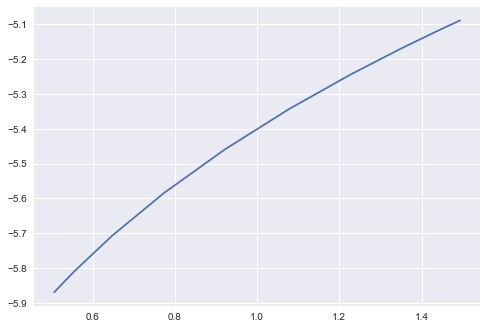

In [20]:
fig, ax = plt.subplots()
ax.plot(k_grid, V)

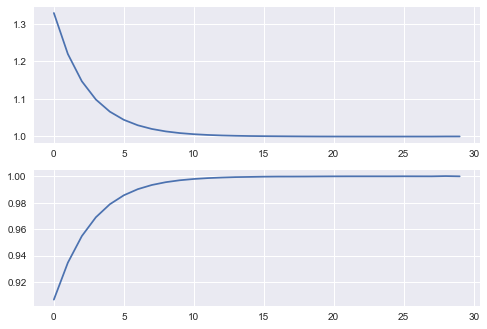

In [21]:
## as a sanity check, plot decision vectors coming from the last iteration
x = res.x
kp = np.exp( x[:int(len(x)/2)] )
h =  np.exp( x[int(len(x)/2):] )

fig, ax = plt.subplots(2,1)
ax[0].plot(kp)
ax[1].plot(h)

(ii) With the function values in **'V'** as data, we can use **chebapprox** to approximate the function using interpolation or regression (e.g. for a degree of approximation equal to 5): 

In [22]:
## interpolation
coef_int = fa.chebapprox(V, m - 1)
## regression
coef_reg = fa.chebapprox(V, 5)

Below, we compare the approximated values for $k_0 = 0.66$ with the true value (for which we have to solve the optimization problem again):

In [23]:
np.polynomial.chebyshev.chebval(fa.chebconvert(0.66, g_min, g_max), coef_int)

-5.6936495496695159

In [24]:
np.polynomial.chebyshev.chebval(fa.chebconvert(0.66, g_min, g_max), coef_reg)

-5.6936202295877338

In [25]:
T = 30

## set initial guess    
x0 = np.concatenate([np.ones(T), np.ones(T)])

## solve model
res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (0.66), tol = 1e-7)
print(res.message)
print(res.success)
print(-res.fun)

Optimization terminated successfully.
True
-5.693649458353905


## Question 4 (N)

In the lecture, we have approximated the Cobb-Douglas production function with two arguments using a tensor product Chebyshev basis. Repeat this exercise with a complete set of Chebyshev polynomials. Try different values for the total degree $l$ and plot the approximation errors.

**Hint**: You can implement the regression step with the function **chebapprox_2d** that was defined in the lecture, by adding a single line!

#### Answer:

The initial steps are exactly the same as in the lecture: we define the functions, initialize one-dimensional Chebyshev grids and then compute the function values using the **meshgrid** function:

In [26]:
def cd_fun(x1, x2, alpha = 0.33):
    """
    Cobb-Douglas Function
    """
    return x1**alpha * x2**(1 - alpha)

N = 31
## min and max for approximation grid
g1_min, g1_max = 0.1, 2
g2_min, g2_max = 0.001, 1
## equidistant grid
x1 = np.linspace(g1_min, g1_max, N)
x2 = np.linspace(g2_min, g2_max, N)

In [27]:
m = 10
x1_c = fa.chebgrid(g1_min, g1_max, m)
x2_c = fa.chebgrid(g2_min, g2_max, m)

X2_c, X1_c = np.meshgrid(x2_c, x1_c)
Y_c = cd_fun(X1_c, X2_c) 

For the fitting step, the only change to **chebapprox_2d** is that we only compute the coefficient **a[idx_1, idx_2]** whenever **idx_1 + idx_2** is less or equal to the total degree **n**:

In [28]:
## two dimensions
def chebapprox_2d(Z, deg, n):
    """
    Computes the (deg[0]+1)-by-(deg[1]+1) coefficient matrix for approximation with Chebyshev basis functions
    NB: Z must be a m1-by-m2 "meshgrid" matrix
    """
    ## get the dimensions of the grid
    m = Z.shape
    ## check of dimension are consistent
    assert len(m) == len(deg), "Inconsistent dimensions"
  
    ## define one-dimensional Chebyshev matrices    
    A, B = fa.chebmatrix(deg[0], m[0]), fa.chebmatrix(deg[1], m[1])
    
    ## Tensor interpolation in two dimensions
    a = np.zeros(np.array(deg) + 1)
    for idx_1 in range(deg[0] + 1):
        for idx_2 in range(deg[1] + 1):  
            if idx_1 + idx_2 <= n:
                den = (A[:, idx_1].T @ A[:, idx_1]) * (B[:, idx_2].T @ B[:, idx_2])
                a[idx_1, idx_2] = (A[:, idx_1].T @ Z) @ B[:, idx_2] / den
    
    return a
         
n = 10
a = chebapprox_2d(Y_c, [m-1, m-1], n)

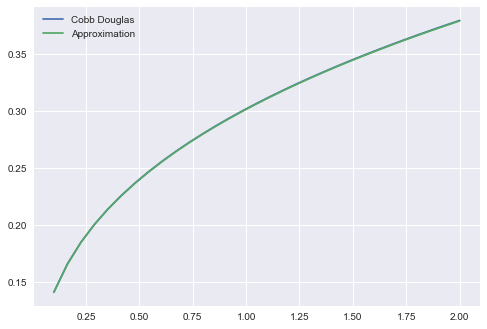

In [29]:
y_app = np.zeros(N)
for idx in range(N):
    y_app[idx] = np.polynomial.chebyshev.chebval2d(fa.chebconvert(x1[idx], g1_min, g1_max), 
                                                   fa.chebconvert(x2[5], g2_min, g2_max), a)  
    
    
fig, ax = plt.subplots()
ax.plot(x1, cd_fun(x1, x2[5]), label = 'Cobb Douglas')
ax.plot(x1, y_app, label = 'Approximation')
ax.legend()

## Question 5 (N)

The simplest approach to approximating a univariate function $f$ is (piecewise) linear interpolation. As before, define a grid $x_1, ..., x_m$ and compute the function values $f(x_1), ... , f(x_m)$. Then, to approximate $f(x)$, find the two grid points $x_i$ and $x_{i+1}$ that bracket $x$, i.e. such that $x_l \equiv x_i \le x \le x_{i + 1} \equiv x_r $. The interpolant is given by:

\begin{equation}
    \hat{f}(x)=f(x_{l})+{\frac {f(x_{r})-f(x_{l})}{x_{r}-x_{l}}}(x-x_{l})
\end{equation}

(a) Write a function **lin_int** that takes three arguments - a scalar **'x'** at which to approximate the function, an array **'X'** consisting of $m$ grid points and an array **'Y'** containing the function values corresponding to the grid - and that implements this interpolation scheme. Use this function to approximate the sine function $f(x) = \sin(x)$ between 0 and $2\pi$. Compare your result to Numpy's **interp** function. Plot both the approximated and the true function values.

**Hint**: The slightly tricky part here is to find $x_l$ and $x_r$. There are different ways to achieve this; one possibility is Numpy's **argwhere** function. You may want to combine this with a **try/except** statement.

(b) Compute the maximum interpolation error when using linear interpolation on a dense grid between 0 and $2\pi$. Compare this to using Chebyshev interpolation. 

#### Answer

(a) 

In [30]:
def lin_int(x, X, Y):
    """
    Implements one-dimensional piecewise linear interpolation given a grid X and corresponding function values Y, on a point x
    """  
    try:
        pos = np.argwhere(x > X)[-1]
    except:
        pos = 0
            
    return Y[pos] + ((Y[pos + 1] - Y[pos]) / (X[pos + 1] - X[pos])) * (x - X[pos])    

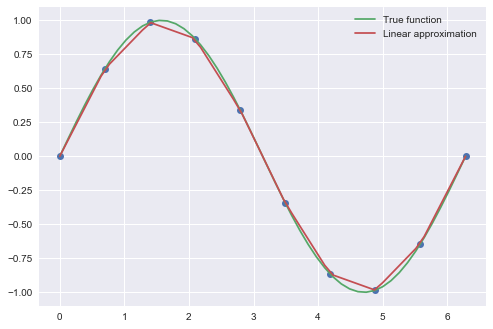

In [31]:
## define grid and compute function values
m = 10
X = np.linspace(0, 2*np.pi, m)
Y = np.sin(X)

## define a dense grid and compute function values
xvals = np.linspace(0, 2*np.pi, 50)
yvals = np.sin(xvals) 

## use lin_int to interpolate function along the dense grid
yapprox = np.zeros(50)
for ind in range(50):
    yapprox[ind] = lin_int(xvals[ind], X, Y)

## plot true and approximated function values     
fig, ax = plt.subplots()   
ax.plot(X, Y, 'o')
ax.plot(xvals, yvals, label = 'True function')
ax.plot(xvals, yapprox, label = 'Linear approximation')
ax.legend()

We can also use the Numpy function **interp**, which gives the same results as our function:

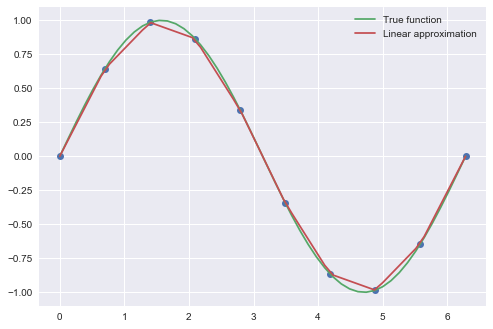

In [32]:
yinterp = np.interp(xvals, X, Y) 

fig, ax = plt.subplots()   
ax.plot(X, Y, 'o')
ax.plot(xvals, yvals, label = 'True function')
ax.plot(xvals, yinterp, label = 'Linear approximation')
ax.legend()


(b) Here, we approximate the function using Chebyshev interpolation and plot the interpolation errors for both approaches:

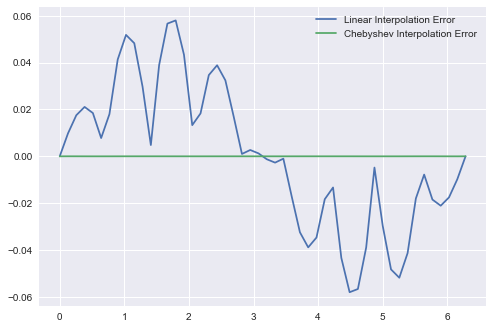

In [33]:
X_cn = fa.chebgrid(0, 2*np.pi, m)
Y_cn = np.sin(X_cn)

a = fa.chebapprox(Y_cn, m - 1)
yapprox_ch = np.polynomial.chebyshev.chebval( fa.chebconvert(xvals, 0, 2*np.pi), a )

fig, ax = plt.subplots()   
ax.plot(xvals, np.sin(xvals) - yapprox, label = 'Linear Interpolation Error')
ax.plot(xvals, np.sin(xvals) - yapprox_ch, label = 'Chebyshev Interpolation Error')
ax.legend()


## Question 6 (N)

This question illustrates the use of interpolation for given grid points. Suppose you have information on some climate indicator, for example the number of hours of sunshine per year, for a finite set of locations, here indexed by latitude and longitude:

Stockholm - 1821 - (59.329444, 18.068611)

Copenhagen - 1539 - (55.676111, 12.568333)

Berlin - 1626 - (52.516667, 13.388889)

Vienna - 1884 - (48.2, 16.366667)

Zagreb - 1913 - (45.816667, 15.983333)

Rome - 2473 - (41.9, 12.5)

The first value gives the annual amount of sunshine, taken from https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration; the tuple contains the latitude and longitude of the corresponding city. This data is captured by the following Numpy array:


Text(0.5,0,'Latitude')

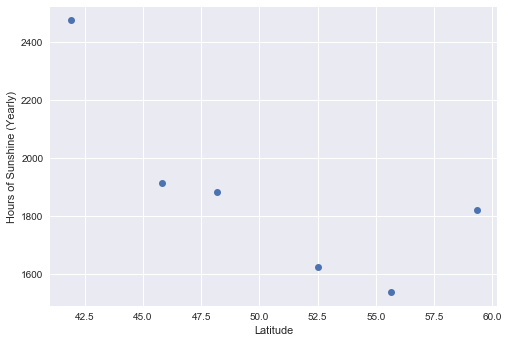

In [34]:
D = np.array([[59.329444, 18.068611, 1821],
              [55.676111, 12.568333, 1539],
              [52.516667, 13.388889, 1626],
              [48.2, 16.366667, 1884],
              [45.816667, 15.983333, 1913],
              [41.9, 12.5, 2473]])


fig, ax = plt.subplots()
ax.plot(D[:,0], D[:,2], 'o')
ax.set_ylabel('Hours of Sunshine (Yearly)')
ax.set_xlabel('Latitude')

(a) Use this data to find a (univariate) function $\hat{f}$ that maps hours of sunshine per year to latitude. We can use this function to predict annual sunshine duration for cities that are not contained in the sample. For example, Prague is represented by the following data:

In [35]:
prague = np.array([50.083333, 14.416667, 1668])

Does $\hat{f}$  over- or underpredict the amount of sunshine in Prague?




(b) Suppose we also include longitude as an explanatory variable in $\hat{f}$. Does this increase or decrease the interpolation error for yearly sunshine duration in Prague? 

#### Answer

(a)

Text(0.5,0,'Latitude')

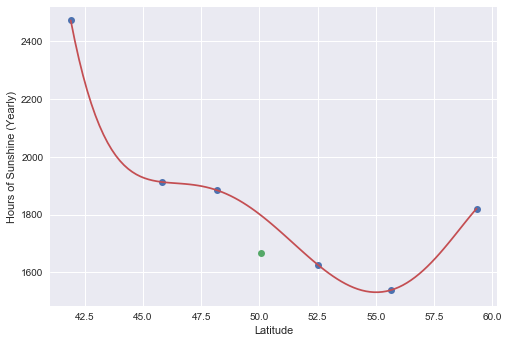

In [36]:
## fitting step
n = 5
a = np.polynomial.chebyshev.chebfit(fa.chebconvert(D[:, 0], D[:, 0].min(), D[:, 0].max() ), D[:,2], n)

## define dense grid for plotting
lat_dense = np.linspace(D[:, 0].min(), D[:, 0].max(), 100)
sh_approx = np.polynomial.chebyshev.chebval(fa.chebconvert(lat_dense, D[:, 0].min(), D[:, 0].max() ), a)

fig, ax = plt.subplots()
ax.plot(D[:,0], D[:,2], 'o')
ax.plot(prague[0], prague[2], 'o')
ax.plot(lat_dense, sh_approx)
ax.set_ylabel('Hours of Sunshine (Yearly)')
ax.set_xlabel('Latitude')

We can see that the function would overpredict the annual sunshine in Prague (represented by the orange point).

(b)

Incorporating a second variable in the approximant $\hat{f}$ is somewhat tricky here, for the simple reason that in this question, we are stuck with six observations. Recall that we want to have at least as many observations/grid points as basis coefficients, and hence the number of basis coefficients is constrained above by 6. 

Assume we use a Tensor product basis. If we set the degree to $n = 1$ in both dimensions (i.e. a linear function), we would have $(n + 1)^2 = 4$ basis coefficients, which would work. 

To find the coefficients, we define the matrix **Phi** containing the Chebyshev polynomials evaluated at the grid points. We then use the regression formula - since we do not use interpolation - to derive the coefficient vector **a_2d**. Note that we cannot use our **chebapprox_2d** here, since we do not use Chebyshev nodes.  

In [37]:
n = 1
Phi = np.polynomial.chebyshev.chebvander2d(fa.chebconvert(D[:, 0], D[:, 0].min(), D[:, 0].max() ), 
                                          fa.chebconvert(D[:, 1], D[:, 1].min(), D[:, 1].max() ), [n, n])
a_2d = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ D[:,2]

Below, we approximate annual sunshine duration for varying latitudes, as above, keeping the second argument (longitude) fixed at the value for Prague. The plot looks different compared to question (a), mainly for the reason that the degree of approximation is lower here ($n = 1$) than it was in the one-dimensional case ($n = 5$), and hence we would expect greater approximation errors.

Text(0.5,0,'Latitude')

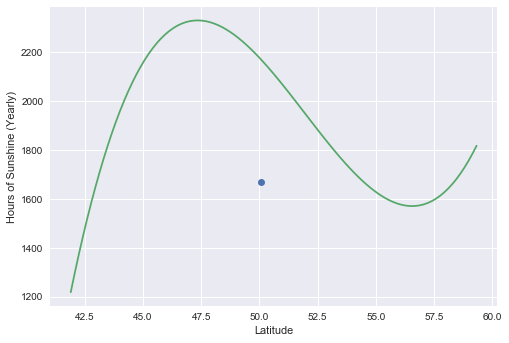

In [38]:
## define dense grid for plotting
lat_dense = np.linspace(D[:, 0].min(), D[:, 0].max(), 100)

sh_approx = np.zeros(100)
for ind in range(100):
    sh_approx[ind] = np.polynomial.chebyshev.chebval2d( fa.chebconvert(lat_dense[ind], D[:, 0].min(), D[:, 0].max()), 
                                           fa.chebconvert(prague[1], D[:, 1].min(), D[:, 1].max()) , a_2d  )

fig, ax = plt.subplots()
# ax.plot(D[:,0], D[:,2], 'o')
ax.plot(prague[0], prague[2], 'o')
ax.plot(lat_dense, sh_approx)
ax.set_ylabel('Hours of Sunshine (Yearly)')
ax.set_xlabel('Latitude')

#### How could we increase the quality of the approximation?


Assuming the number of observations is fixed, we could use a complete set of polynomials rather than a Tensor product basis. This would allow us to include some quadratic terms, since in the case of two dimensions, a total degree of 2 would result in six elements in the basis, i.e. we would have as many basis coefficients as observations. Of course, this may not have a large impact on the approximation. A more promising approach to get a better approximation for the function of interest would be to *increase the number of observations*, if possible.